<a href="https://colab.research.google.com/github/Ohellay/arbitrary/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding linear regression through scratch

In [ ]:
# Importing libraries:- panda, numpy, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Scratch Linear Regression

In [ ]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data
    """

    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _linear_hypothesis(self, X):

        """
    Compute a linear hypothetical function

    Parameters
    ----------
    X : of the following form. ndarray, shape (n_samples, n_features)
      Training data

    Returns
    -------
      of the following form. ndarray, shape (n_samples, 1)
      Estimated result by linear hypothetical function

    """
        x1 = X
        if self.no_bias == True:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])

        return np.concatenate([x0.reshape(-1,1), x1], axis =1)

    def _gradient_descent(self, X, error):
        """
        Write a description
        """
        self.theta = self.theta - self.lr* np.dot(error, X)/len(X)



    def fit(self, X, y, X_val=False, y_val=False):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """
        x1 = self._linear_hypothesis(X)

        #Give the initial value of parameter 0 as a random number
        self.theta = np.random.random(x1.shape[1])

        for i in range(self.iter):
            # Compute predicrions with hypothetical functions
            y_pred = np.dot(x1, self.theta)
            # calculate the error between the true value and the predicted value
            error = y_pred  - y
            self.loss[i] = 0.5 * np.mean((error)** 2)

            # if X_valid is entered, it wil be read as x2
            if(type(X_val) != bool):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2, self.theta)

                error_val = y2 - y_val
                self.val_loss[i] = 0.5 * np.mean(error_val ** 2)

                #optimise the parameter theta by the steepest descent method
                self._gradient_descent(x1, error)

                if self.verbose:
                    # Outputs the learning process when verbose is set to true.
                    print("iterations: ", i,
                          "loss: ", self.loss[i],
                          "theta: ", self.theta)


    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        return np.dot(self._linear_hypothesis(X),self.theta)

【problem1】Hypothetical function

Implement the linear regression hypothetical function represented by the following formula.


In [ ]:
x1 = np.array([0,1,2,3,4,5,6,7,8,9])
x0 =np.ones(x1.shape[0])

X = np.concatenate([x0.reshape(-1, 1), x1.reshape(-1,1)], axis =1)
theta = np.random.random(X.shape[1])

X.shape

(10, 2)

In [ ]:
theta

array([0.74707594, 0.18726112])

In [ ]:
np.dot(X, theta)

array([0.74707594, 0.93433706, 1.12159819, 1.30885931, 1.49612043,
       1.68338155, 1.87064267, 2.0579038 , 2.24516492, 2.43242604])

【problem2】Steepest descent

Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and


In [ ]:
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1), x1.reshape(-1,1)], axis=1)
theta = np.random.random(2)

y1 = np.dot(X, theta)
alpha = 0.01
error = (y1 - y)
theta = theta - alpha*np.dot(error, X)/len (X)
print(theta)

error= (y1-y)
theta[0] = theta[0]- alpha *np.mean(error)
theta[1] = theta[1] - alpha *np.mean(error*x1)

[0.43430726 0.7014696 ]


In [ ]:
np.mean(error)

np.float64(-0.9412807832430242)

In [ ]:
np.mean(error*x1)

np.float64(-1.5235633452753916)

In [ ]:
np.dot(X, theta)

array([0.44372007, 1.16042531, 1.87713054, 2.59383578, 3.31054101,
       4.02724625, 4.74395148, 5.46065672, 6.17736195])

In [ ]:
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1), x1.reshape(-1,1)], axis=1)
theta = np.random.random(2)

y1 = np.dot(X, theta)
alpha = 0.01
error = (y1 - y)
theta = theta - alpha*np.dot(error, X)/len (X)
print(theta)

error= (y1-y)
theta[0] = theta[0]- alpha *np.mean(error)
theta[1] = theta[1] - alpha *np.mean(error*x1)

[0.03021688 0.84075292]


In [ ]:
X.shape


(9, 2)

In [ ]:
y1.shape

(9,)

In [ ]:
y1.reshape(-1, 1)

array([[0.02315986],
       [0.8687222 ],
       [1.71428453],
       [2.55984687],
       [3.40540921],
       [4.25097155],
       [5.09653389],
       [5.94209622],
       [6.78765856]])

In [ ]:
y.shape

(9,)

In [ ]:
error.reshape(-1,1)

array([[-1.97684014],
       [-3.1312778 ],
       [-0.28571547],
       [ 1.55984687],
       [-2.59459079],
       [-2.74902845],
       [-2.90346611],
       [ 0.94209622],
       [ 4.78765856]])

In [ ]:
theta

array([0.0372739 , 0.83594351])

【problem 3】Estimated
Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchLinearRegression class.

The output of the hypothetical function $h_\theta(x)$ is the estimation result.

In [ ]:
X = np.random.randn(30,1)
y = np.random.randn(30,)
X_test = np.random.randn(5,1)

In [ ]:
X.max()

np.float64(2.176571988679555)

X_shape (30, 1)
y_shape (30,)
(5,)


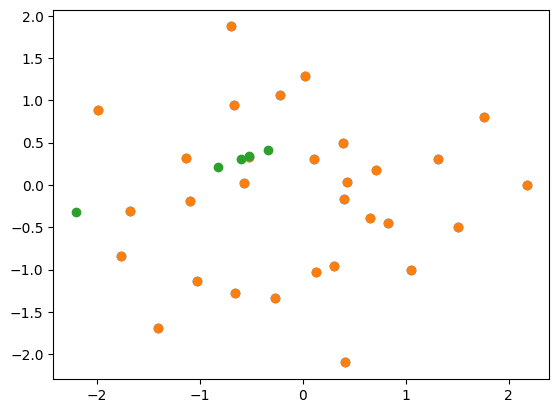

In [ ]:
print('X_shape', X.shape)
print('y_shape', y.shape)

reg =  ScratchLinearRegression(num_iter=10000, lr=0.0001, verbose=False)

reg.fit(X,y)
y_pred = reg.predict(X_test)

print(y_pred.shape)
plt.scatter(X, y)
plt.scatter(X,y)
plt.scatter(X_test, y_pred)
plt.plot();

problem 4】Mean squared error
Create a function of mean square error (MSE) used as an index value for linear regression.

Since the mean square error function is a function that can be used for regression problems in general, create it as a separate function instead of the method of the ScratchLinearRegression class.

In [ ]:
def MSE(y_pred, y):
    """
    Calculation of mean square error

    Parameters
    ----------
    y_pred : of the following form. ndarray, shape (n_samples,)
      Estimated value
    y : of the following form. ndarray, shape (n_samples,)
      Correct answer value

    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    mse = np.mean((y_pred - y )** 2)

    return mse

In [ ]:
y_test = np.array([2,4,2,1,6])
y_pred = np.array([1,4,3,5,2])

mse = MSE(y_pred, y_test)

mse

np.float64(6.8)

In [ ]:
# Check if the calculation result are correct.
from sklearn.metrics import mean_squared_error

y_test = np.array([2,4,2,1,6])
y_pred = np.array([1,4,3,5,2])
mean_squared_error(y_test, y_pred)

np.float64(6.8)

problem 5】Objective function
Implement the objective function (loss function) of linear regression represented by the following formula and be sure to record this inself.loss,self.val_loss.

The objective function (loss function) $J(\theta)$ is the following formula

In [ ]:
print(reg.loss.shape)
reg.loss.reshape(-1,1)


(10000,)


array([[0.71937467],
       [0.71937467],
       [0.71937467],
       ...,
       [0.71937467],
       [0.71937467],
       [0.71937467]])

In [ ]:
print (reg.val_loss.shape )
reg.val_loss.reshape(-1,1)

(10000,)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Problem 6 Learning and Estimation

Learn and estimate scratch implementations from the House Prices competition data provided in Sprint, an introduction to machine learning scratch.

Compare this with the scikit-learn implementation and see if it works correctly.

In [ ]:
df = pd.read_csv("../Downloads/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X = df[["YearBuilt"]].values
y = df[["SalePrice"]].values
y = y.reshape(-1)
print("X.shape:", X.shape)
print("y.shape:", y.shape)

#Split into training data and validation data
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test_shape:", y_test.shape)

X.shape: (1460, 1)
y.shape: (1460,)
X_train.shape: (1168, 1)
y_train.shape: (1168,)
X_test.shape: (292, 1)
y_test_shape: (292,)


In [ ]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

# Fit the model
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

In [ ]:
lreg =  ScratchLinearRegression(num_iter=10000,  lr=0.001)

lreg.fit(X_train_std, y_train, X_test_std, y_test)
y_pred1 =lreg.predict(X_test_std)

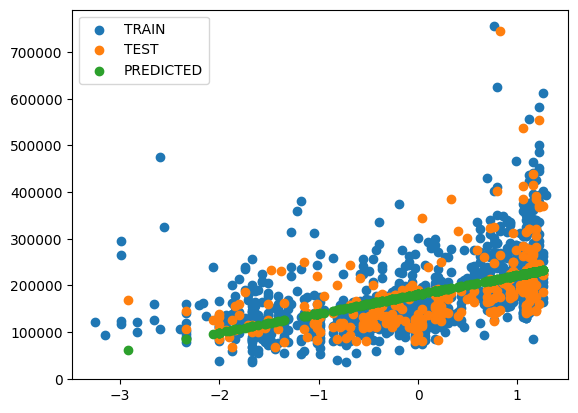

In [ ]:
fig, ax  = plt.subplots(figure=(15,12))

plt.scatter(X_train_std, y_train,label="TRAIN")
plt.scatter(X_test_std, y_test, label = "TEST")
plt.scatter(X_test_std, y_pred1, label = "PREDICTED")
plt.legend()
plt.show();



In [ ]:
y_pred1

array([162110.12038622, 140580.89605896, 152691.08474304, 189021.65079531,
       180948.19167258,  98868.02392488, 229388.94640893, 135198.58997714,
       214587.60468393, 225352.21684757, 228043.36988848, 187676.07427485,
       218624.3342453 , 175565.88559076, 149999.93170213, 162110.12038622,
       209205.29860212, 211896.45164303, 174220.30907031, 105595.90652715,
       155382.23778395, 225352.21684757, 170183.57950895, 211896.45164303,
       184984.92123394,  61191.88135216, 219969.91076575, 179602.61515213,
       229388.94640893, 148654.35518168, 163455.69690668, 210550.87512257,
       190367.22731576, 219969.91076575, 230734.52292938, 214587.60468393,
       226697.79336802, 182293.76819303, 224006.64032711, 211896.45164303,
       152691.08474304, 159418.96734531, 226697.79336802, 225352.21684757,
       213242.02816348, 171529.1560294 , 159418.96734531, 187676.07427485,
       190367.22731576, 147308.77866123, 224006.64032711, 172874.73254986,
       189021.65079531, 1

In [ ]:
mse = MSE(y_pred1, y_test)
print(f'MSE(:1f): {mse}')
print(f'RMSE(:.1f):{np.sqrt(mse)}')

MSE(:1f): 4980053688.29519
RMSE(:.1f):70569.49545161273


In [ ]:
from sklearn.linear_model import LinearRegression
sklreg = LinearRegression()
sklreg.fit(X_train_std, y_train)
y_pred_sklearn = sklreg.predict(X_test_std)

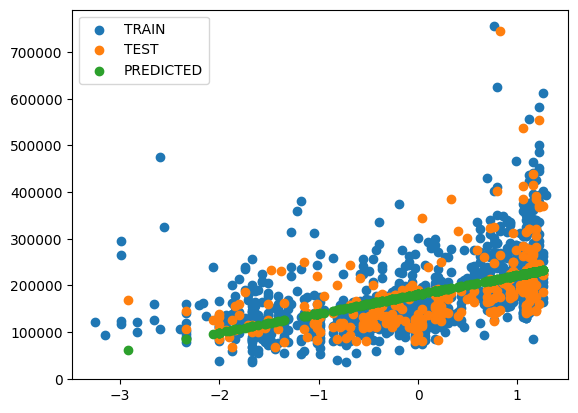

In [ ]:
fig, ax  = plt.subplots(figure=(15,12))

plt.scatter(X_train_std, y_train,label="TRAIN")
plt.scatter(X_test_std, y_test, label = "TEST")
plt.scatter(X_test_std, y_pred_sklearn, label = "PREDICTED")
plt.legend()
plt.show();


In [ ]:
mse = MSE(y_pred_sklearn, y_test)
print(f'MSE(:1f): {mse}')
print(f'RMSE(:.1f):{np.sqrt(mse)}')

MSE(:1f): 4980069536.617275
RMSE(:.1f):70569.60774028204


Comparing the mse with sklearn gave same mean square error of 4980053688.256175 and same root mean square of 70569.60774028204

Problem 7

Plotting the learning curve
Create and execute a function that displays the learning curve. Look at the graph to see if the loss is down properly.

In [ ]:
def plot_learning_curve(model):
    plt.plot(model.loss, label="Training Loss")
    plt.plot(model.val_loss, label ="Validation Loss")
    plt.xlabel('Iteration')
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    plt.legend()
    plt.show()

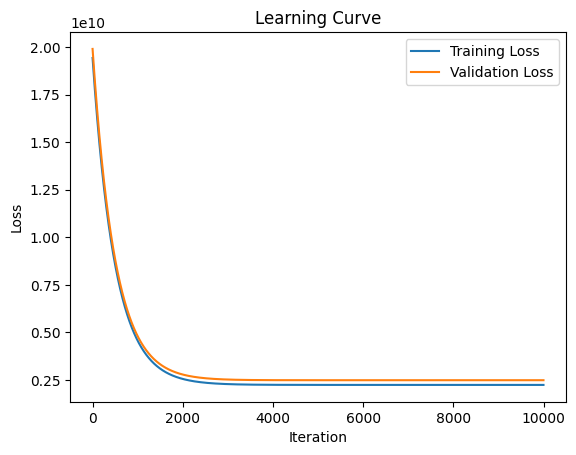

In [ ]:
plot_learning_curve(lreg)

【problem 8】(Advance task) Removal of bias term
Verify how learning changes when the bias term $\theta_0$ is removed. Also, consider and investigate the role of bias terms in linear regression models.

In [ ]:
no_biasreg = ScratchLinearRegression(num_iter=10000, lr=0.001, no_bias=True)

no_biasreg.fit(X_train_std, y_train, X_test_std, y_test)
ypred_no_bias = no_biasreg.predict(X_test_std)

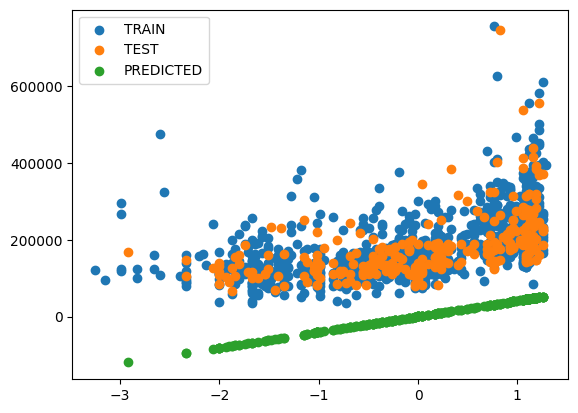

In [ ]:
fig, ax  = plt.subplots(figure=(15,12))

plt.scatter(X_train_std, y_train,label="TRAIN")
plt.scatter(X_test_std, y_test, label = "TEST")
plt.scatter(X_test_std, ypred_no_bias, label = "PREDICTED")
plt.legend()
plt.show();


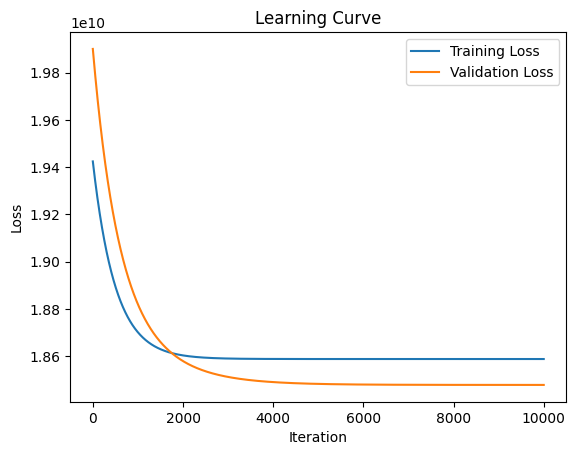

In [ ]:
plot_learning_curve(no_biasreg)

The curve shows a different pattern that when the bias was added to when there was no bias

The bias term play a crucial role in linear regression as it allows the modek to shift the regression line up or down to better fit the data ...without the bias from the previous graph that the model is force to pass through the origin(0,0)

In [ ]:
theta

array([0.0372739 , 0.83594351])

problem 9】(Advance task) Multidimensional feature quantity


Please verify how the learning result changes when the square or cube of the feature is used for input.

In [ ]:
X = df[["YearBuilt", "YearBuilt"]].values
y= df["SalePrice"].values
y= y.reshape(-1)

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (1460, 2)
y.shape: (1460,)


In [ ]:
X[:,1] = X[:, 1]**2

X

array([[   2003, 4012009],
       [   1976, 3904576],
       [   2001, 4004001],
       ...,
       [   1941, 3767481],
       [   1950, 3802500],
       [   1965, 3861225]])

In [ ]:
#Split into training data and validation data
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test_shape:", y_test.shape)

X_train.shape: (1168, 2)
y_train.shape: (1168,)
X_test.shape: (292, 2)
y_test_shape: (292,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit the model
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

In [ ]:
model_multid = ScratchLinearRegression(num_iter=5000, lr=0.01)
model_multid.fit(X_train_std, y_train,X_test_std, y_test)
y_pred_model = model_multid.predict(X_test_std)

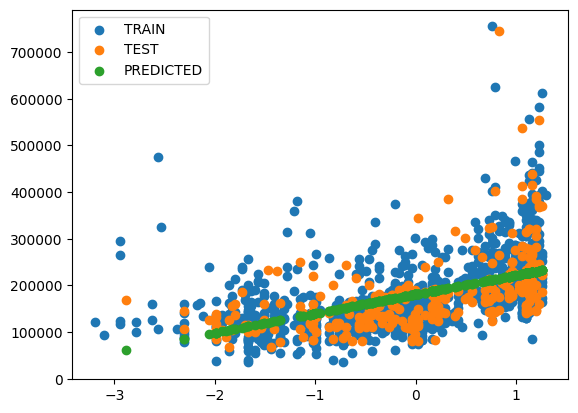

In [ ]:
fig, ax  = plt.subplots(figure=(15,12))

plt.scatter(X_train_std[:,1], y_train, label="TRAIN")
plt.scatter(X_test_std[:,1], y_test,  label = "TEST")
plt.scatter(X_test_std[:,1], y_pred_model, label = "PREDICTED")
plt.legend()
plt.show();

In [ ]:
mse = MSE(y_pred_model, y_test)
print(f'MSE(:1f): {mse}')
print(f'RMSE(:.1f):{np.sqrt(mse)}')

MSE(:1f): 4971463722.596804
RMSE(:.1f):70508.60743623294


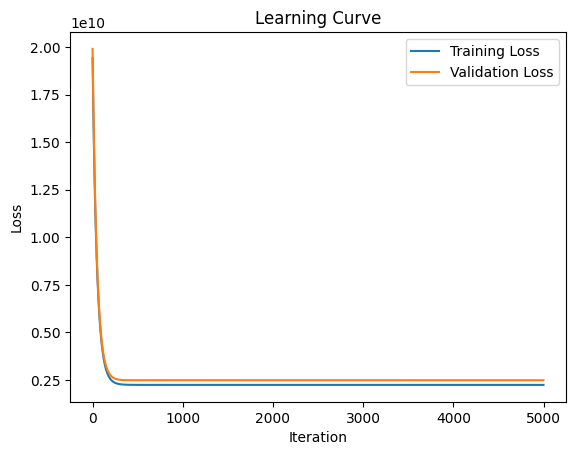

In [ ]:
plot_learning_curve(model_multid)

In [ ]:
X = df[["YearBuilt", "YearBuilt", "YearBuilt"]].values
y= df["SalePrice"].values
y= y.reshape(-1)

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (1460, 3)
y.shape: (1460,)


In [ ]:
X[:,1] = X[:, 1]**2
X[:,2] = X[:, 2]**3

X

array([[      2003,    4012009, 8036054027],
       [      1976,    3904576, 7715442176],
       [      2001,    4004001, 8012006001],
       ...,
       [      1941,    3767481, 7312680621],
       [      1950,    3802500, 7414875000],
       [      1965,    3861225, 7587307125]])

In [ ]:
#Split into training data and validation data
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test_shape:", y_test.shape)

X_train.shape: (1168, 3)
y_train.shape: (1168,)
X_test.shape: (292, 3)
y_test_shape: (292,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit the model
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

In [ ]:
model_multid_3 = ScratchLinearRegression(num_iter=5000, lr=0.01)
model_multid_3.fit(X_train_std, y_train,X_test_std, y_test)
y_pred_model_3 = model_multid_3.predict(X_test_std)

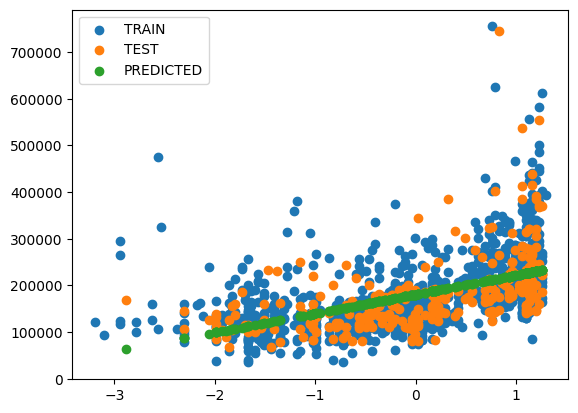

In [ ]:
fig, ax  = plt.subplots(figure=(15,12))

plt.scatter(X_train_std[:,1], y_train, label="TRAIN")
plt.scatter(X_test_std[:,1], y_test,  label = "TEST")
plt.scatter(X_test_std[:,1], y_pred_model_3, label = "PREDICTED")
plt.legend()
plt.show();

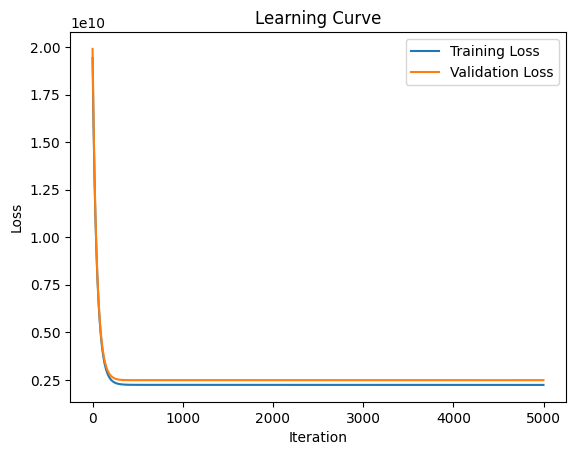

In [ ]:
plot_learning_curve(model_multid_3)

A slight improvement was made by the model when it was fitted on the 3 power

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Using other features
X = df[["OverallCond", "GrLivArea", "GarageArea"]].values
y= df["SalePrice"].values
y= y.reshape(-1)

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (1460, 3)
y.shape: (1460,)


In [ ]:
#Split into training data and validation data
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test_shape:", y_test.shape)

X_train.shape: (1168, 3)
y_train.shape: (1168,)
X_test.shape: (292, 3)
y_test_shape: (292,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit the model
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

In [ ]:
model_multid_diff = ScratchLinearRegression(num_iter=5000, lr=0.01)
model_multid_diff.fit(X_train_std, y_train,X_test_std, y_test)
y_pred_model_diff = model_multid_3.predict(X_test_std)

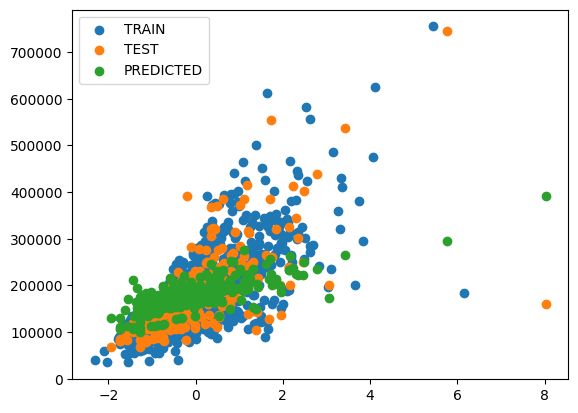

In [ ]:
fig, ax  = plt.subplots(figure=(15,12))

plt.scatter(X_train_std[:,1], y_train, label="TRAIN")
plt.scatter(X_test_std[:,1], y_test,  label = "TEST")
plt.scatter(X_test_std[:,1], y_pred_model_diff, label = "PREDICTED")
plt.legend()
plt.show();

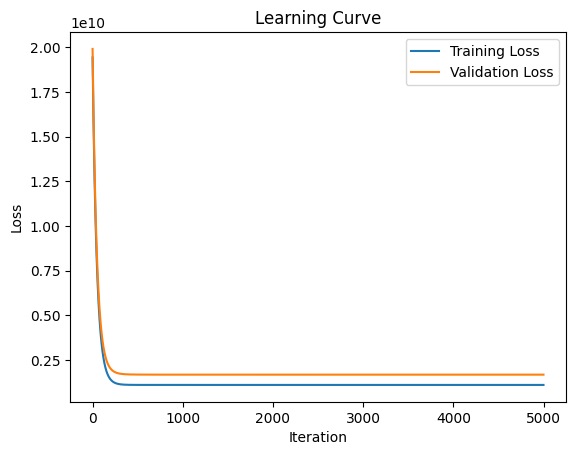

In [ ]:
plot_learning_curve(model_multid_diff)

In [ ]:
mse = MSE(y_pred_model_diff, y_test)
print(f'MSE(:1f): {mse}')
print(f'RMSE(:.1f):{np.sqrt(mse)}')

MSE(:1f): 4198982285.4704857
RMSE(:.1f):64799.55467030993


There is a need for improvement as the mean square has a large value.The high Mse indicates that the model's prediction are far from the actual values which can also be visualize from the plot,The hivgh Rmse confirms that a model prediction are not close to the actual values.The model definitely needs improvements


### problem 10】(Advance task) Derivation of update formula
The update formula for the steepest descent method was as follows. Explain the process by which this equation is derived.

### Steepest Descent Method Update Formula Derivation

We start with the objective (loss) function $J(\theta)$, which represents how far our predictions are from the actual values, given a parameter vector $\theta$. A common form of this function in machine learning is the mean squared error (MSE) for linear regression, but it could represent any differentiable function.

#### 1. The Objective Function
Let the objective function be denoted as:

$$
J(\theta) = \frac{1}{2} \sum_{i=1}^{n} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

where:
- $h_\theta(x^{(i)})$ is the hypothesis (prediction) based on the parameters $\theta$ and input $x^{(i)}$.
- $y^{(i)}$ is the actual output.
- $n$ is the number of training examples.

This function measures the cost associated with using the parameter $\theta$ to predict the output $y^{(i)}$.

#### 2. Gradient of the objective function

The key idea of gradient descent is to adjust $\theta$ in the direction that decreases $J(\theta)$ the fastest. This direction is given by the **negative gradient** of $J(\theta)$, which we compute as:

$$
\nabla_\theta J(\theta) = \frac{\partial J(\theta)}{\partial \theta}
$$

This gradient gives us the direction of the steepest ascent, so to minimize the cost function, we move in the opposite direction, i.e., the direction of steepest descent.

#### 3. Update rule

The update rule for the steepest descent method (gradient descent) adjusts the parameters $\theta$ iteratively using the gradient. The update formula is:

$$
\theta := \theta - \alpha \nabla_\theta J(\theta)
$$

where:
- $\alpha$ is the learning rate, a positive scalar that determines the size of the steps we take towards the minimum.
- $\nabla_\theta J(\theta)$ is the gradient of the objective function with respect to $\theta$.

#### 4. Interpretation of the formula

- **Gradient $\nabla_\theta J(\theta)$**: This gives the slope of the objective function at the current point $\theta$.
- **Learning rate $\alpha$**: Controls how large a step we take in the direction of the negative gradient. A small $\alpha$ makes the algorithm slow but stable, while a large $\alpha$ can lead to faster convergence but risks overshooting the minimum.

In summary, the steepest descent method repeatedly updates the parameters $\theta$ by subtracting a fraction (controlled by $\alpha$) of the gradient, which ensures movement toward the minimum of the objective function.


## 【problem 11】(Advance task) Problem of local optimum solution


The steepest descent method generally has the problem of locally optimal solutions. However, with linear regression, you can always find the optimal solution if you continue learning. Please explain it using mathematical formulas and graphs for some reason.

### Why Gradient Descent for Linear Regression Always Finds the Optimal Solution

In the case of linear regression, the **steepest descent method** (or gradient descent) can always find the **global optimal solution** because the cost function for linear regression is **convex**. A convex function has a single global minimum, meaning that any local minimum is also the global minimum.

#### 1. Linear Regression Cost Function

The cost function for linear regression is often defined as the **mean squared error (MSE)**, given by:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

where:
-$$ \( h_\theta(x^{(i)}) = \theta^T x^{(i)} \) $$ is the hypothesis (prediction) based on the parameter vector \( \theta \) and input $$ \( x^{(i)} \) $$.
- $$\( y^{(i)} \)$$ is the actual output.
-$$ \( m \) $$ is the number of training examples.

#### 2. Convexity of the Cost Function

For linear regression, the cost function \( J(\theta) \) is **convex** because it is a quadratic function of \( \theta \). Mathematically, the Hessian matrix of second-order partial derivatives for a convex function is **positive semi-definite**, meaning that:

$$
\frac{\partial^2 J(\theta)}{\partial \theta^2} \geq 0
$$

For a quadratic function like the one used in linear regression, the graph of the cost function is a **paraboloid** in multiple dimensions. This ensures that there is only one global minimum, and gradient descent will converge to this point regardless of the initial starting point.

#### 3. Gradient Descent Update Rule

The steepest descent method adjusts the parameters iteratively based on the negative of the gradient of the cost function:

$$
\theta := \theta - \alpha \nabla_\theta J(\theta)
$$

where:
- $$\( \nabla_\theta J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)} \) is the gradient of the cost function with respect to \( \theta \).
- \( \alpha \) is the learning rate. $$

Since$$ \( J(\theta) \) $$ is convex, gradient descent is guaranteed to converge to the global minimum as long as a proper learning rate $$ \( \alpha \)$$ is chosen.

#### 4. No Local Minima in Linear Regression

Because the cost function is convex, it does **not** have any local minima—there is only one global minimum. Therefore, if you continue iterating with gradient descent, you will eventually reach the optimal solution, no matter where you start. This is different from non-convex functions, where local minima can trap the algorithm.

#### 5. Graphical Explanation

In a graphical explanation, the cost function for linear regression forms a smooth bowl-shaped curve (paraboloid in multiple dimensions). Here’s how the gradient descent algorithm behaves in this setup:

- **Cost Function**: The cost function is convex and forms a smooth curve or bowl, meaning that any movement toward decreasing the cost will eventually lead to the global minimum.
  
- **Convergence**: Starting from any point on this curve, gradient descent will move "downhill" toward the lowest point because the gradient always points in the direction of steepest ascent, and we move in the opposite direction.

#### Graphs:

1. **Cost Function Graph**:
   - The graph of \( J(\theta) \) is a parabola (for one parameter) or a paraboloid (for multiple parameters). The shape guarantees that there’s only one global minimum.
   
2. **Gradient Descent Path**:
   - The path that gradient descent follows is always toward the bottom of the parabola or bowl, and the step size depends on the learning rate $\( \alpha \)$.

In two dimensions, you can visualize the cost function as a bowl, and gradient descent moves downhill toward the bottom of the bowl. Here's a simple illustration of the cost function's shape and the gradient descent path:

#### Parabolic Cost Function

- The y-axis represents \( J(\theta) \) (the cost function).
- The x-axis represents \( \theta \) (the model parameters).

The curve is smooth and convex:

$$
J(\theta) \text{ (cost)} \quad vs. \quad \theta \text{ (parameter)}
$$

#### Gradient Descent Path

At each step of gradient descent, the algorithm moves toward the minimum along the path dictated by the negative gradient:

$$
\theta := \theta - \alpha \nabla_\theta J(\theta)
$$

---

### Conclusion

In summary, because the cost function for linear regression is convex, there are no local minima to worry about. If you continue learning using the gradient descent method, it will eventually converge to the global minimum solution, which is the optimal solution for the model. This property of convex functions ensures that linear regression will always find the best possible solution.


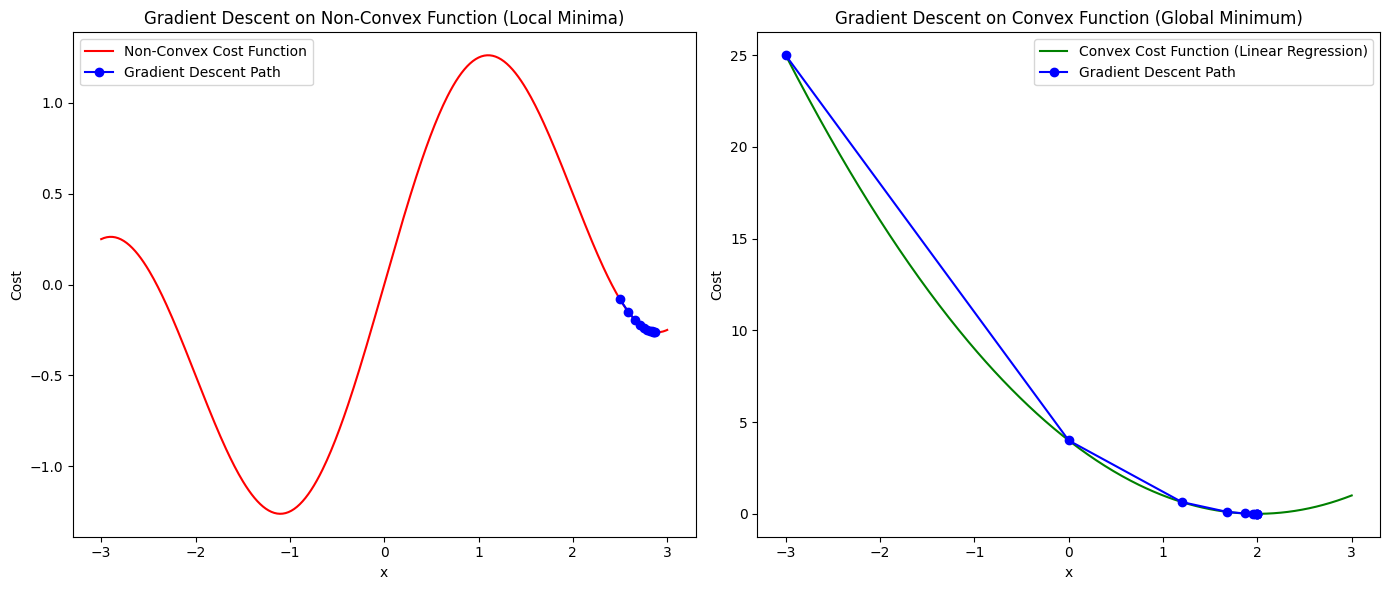

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a non-convex cost function
def non_convex_cost(x):
    return np.sin(0.5 * np.pi * x) + 0.25 * x

# Derivative of the non-convex function for gradient descent
def non_convex_cost_derivative(x):
    return 0.5 * np.pi * np.cos(0.5 * np.pi * x) + 0.25

# Simulating the convex cost function of linear regression
def convex_cost(x):
    return (x - 2)**2

# Derivative of the convex cost function for gradient descent
def convex_cost_derivative(x):
    return 2 * (x - 2)

# Gradient Descent Simulation
def gradient_descent(f_derivative, initial_x, learning_rate, n_iterations=10):
    x_values = [initial_x]
    x = initial_x
    for _ in range(n_iterations):
        x = x - learning_rate * f_derivative(x)
        x_values.append(x)
    return x_values

# Plotting the Non-Convex Cost Function
x_range = np.linspace(-3, 3, 400)
non_convex_y = non_convex_cost(x_range)

plt.figure(figsize=(14, 6))

# Plot non-convex function
plt.subplot(1, 2, 1)
plt.plot(x_range, non_convex_y, label="Non-Convex Cost Function", color='red')
initial_x = 2.5
x_values = gradient_descent(non_convex_cost_derivative, initial_x, learning_rate=0.1)
plt.plot(x_values, non_convex_cost(np.array(x_values)), 'bo-', label="Gradient Descent Path")
plt.title('Gradient Descent on Non-Convex Function (Local Minima)')
plt.xlabel('x')
plt.ylabel('Cost')
plt.legend()

# Plot convex cost function
convex_y = convex_cost(x_range)

plt.subplot(1, 2, 2)
plt.plot(x_range, convex_y, label="Convex Cost Function (Linear Regression)", color='green')
initial_x = -3
x_values = gradient_descent(convex_cost_derivative, initial_x, learning_rate=0.3)
plt.plot(x_values, convex_cost(np.array(x_values)), 'bo-', label="Gradient Descent Path")
plt.title('Gradient Descent on Convex Function (Global Minimum)')
plt.xlabel('x')
plt.ylabel('Cost')
plt.legend()

plt.tight_layout()
plt.show()


The graphical plots above is used to illustrate the key differences between a convex and non-convex cost function. In linear regression, the cost function is convex, meaning that gradient descent will always converge to the global minimum, whereas in non-convex functions, local minima can trap the algorithm.

Visual Explanation with Plots:
Non-Convex Cost Function (General Case):
This plot will show how gradient descent can get stuck in local minima due to the non-convexity of the cost function.
Convex Cost Function (Linear Regression):
This plot will demonstrate the convex nature of the cost function for linear regression, where gradient descent will always converge to the global minimum, no matter the starting point.

### Explanation of the Code:
## Non-Convex Function:
We define a sinusoidal function
sin
⁡
(
0.5
𝜋
𝑥
)
+
0.25
𝑥
sin(0.5πx)+0.25x to simulate a non-convex cost function, which can have local minima.

The gradient descent path for this function demonstrates how it may get stuck in a local minimum depending on the starting point.
# Convex Function (Linear Regression):
We use a simple quadratic function
(
𝑥
−
2
)
2
(x−2)
2
  to simulate the convex cost function of linear regression.
The gradient descent path for this function always converges to the global minimum, regardless of the starting point.
## Gradient Descent Simulation:
The gradient_descent function takes the derivative of the cost function and performs a specified number of iterations to update the parameter
𝑥
x using the gradient descent rule.
Plotting:
We visualize the cost functions and overlay the gradient descent path to show how the optimization process behaves for both non-convex and convex cases.

## Visual Result:
1. Non-Convex Function Plot:
Red Curve: The non-convex cost function with multiple minima.
Blue Path: The path gradient descent follows when started from an initial point, showing that it can get trapped in a local minimum instead of the global one.
2. Convex Function Plot (Linear Regression):
Green Curve: The convex cost function (as in linear regression).
Blue Path: The gradient descent path, which always leads to the global minimum (in this case, at x=2), regardless of the starting point.

## Explanation of the Result:
Non-Convex Function:

In the non-convex case, gradient descent may converge to a local minimum. This is common in more complex models, where the cost function has multiple valleys, and gradient descent might stop at a suboptimal point.
Convex Function (Linear Regression):

In linear regression, the cost function is convex, meaning that no matter where gradient descent starts, it will always converge to the global minimum. This ensures that we always find the best parameters for the model.
This visual example demonstrates why linear regression, with its convex cost function, avoids the pitfalls of local minima and guarantees finding the optimal solution